In [5]:
import pandas as pd
import numpy as np


In [57]:
import pandas as pd

dtypes = {
    "ra": "float32",
    "dec": "float32",
    "parallax": "float32",
    "err_mag_pstotal_r": "float32",
    "gaia_ruwe": "float32",
    "gaia_parallax_over_error": "float32",
    "gaia_classprob_dsc_combmod_star": "float32",
    "gaia_in_qso_candidates": "int8",
    "gaia_in_galaxy_candidates": "int8",
    "gaia_phot_bp_rp_excess_factor": "float32",
    "mag_pstotal_r": "float32",
    "mag_pstotal_i": "float32",
    "mag_pstotal_j0660": "float32",
}

df = pd.read_csv(
    "../data/all_0.7frac.csv",
    engine="pyarrow",
    dtype=dtypes,
    usecols=list(dtypes.keys())
)

In [3]:
df.columns.tolist()

['id',
 'ra',
 'dec',
 'err_mag_pstotal_g',
 'err_mag_pstotal_i',
 'err_mag_pstotal_j0378',
 'err_mag_pstotal_j0395',
 'err_mag_pstotal_j0410',
 'err_mag_pstotal_j0430',
 'err_mag_pstotal_j0515',
 'err_mag_pstotal_j0660',
 'err_mag_pstotal_j0861',
 'err_mag_pstotal_r',
 'err_mag_pstotal_u',
 'err_mag_pstotal_z',
 'mag_pstotal_g',
 'mag_pstotal_i',
 'mag_pstotal_j0378',
 'mag_pstotal_j0395',
 'mag_pstotal_j0410',
 'mag_pstotal_j0430',
 'mag_pstotal_j0515',
 'mag_pstotal_j0660',
 'mag_pstotal_j0861',
 'mag_pstotal_r',
 'mag_pstotal_u',
 'mag_pstotal_z',
 'separation_arcsec',
 'gaia_solution_id',
 'gaia_designation',
 'gaia_source_id',
 'gaia_random_index',
 'gaia_ref_epoch',
 'gaia_ra',
 'gaia_ra_error',
 'gaia_dec',
 'gaia_dec_error',
 'gaia_parallax',
 'gaia_parallax_error',
 'gaia_parallax_over_error',
 'gaia_pm',
 'gaia_pmra',
 'gaia_pmra_error',
 'gaia_pmdec',
 'gaia_pmdec_error',
 'gaia_ra_dec_corr',
 'gaia_ra_parallax_corr',
 'gaia_ra_pmra_corr',
 'gaia_ra_pmdec_corr',
 'gaia_dec_

In [37]:
df = df[['id',
 'ra',
 'dec',
 'err_mag_pstotal_g',
 'err_mag_pstotal_i',
 'err_mag_pstotal_j0660',
 'err_mag_pstotal_r',
 'mag_pstotal_g',
 'mag_pstotal_i',
 'mag_pstotal_j0660',
 'mag_pstotal_r', 
 'gaia_parallax',
 'gaia_parallax_over_error',
 'gaia_pm',
 'gaia_pmra',
 'gaia_pmdec',
 'gaia_ruwe',
 'gaia_in_qso_candidates',
 'gaia_in_galaxy_candidates',
 'gaia_classprob_dsc_combmod_star',
 'gaia_phot_bp_rp_excess_factor',
 'gaia_bp_rp',
 'gaia_l',
 'gaia_b']]



In [58]:
df = df[(df['err_mag_pstotal_r'] < 0.2)&(df['gaia_ruwe'] < 1.6) & (df['gaia_parallax_over_error'] > 3) & (df['gaia_classprob_dsc_combmod_star'] > 0.5) & (df['gaia_in_qso_candidates'] == 0) & (df['gaia_in_galaxy_candidates'] == 0) & (df['gaia_phot_bp_rp_excess_factor'].between(1.0, 1.3))]

In [59]:
df

,ra,dec,parallax,err_mag_pstotal_r,gaia_ruwe,gaia_parallax_over_error,gaia_classprob_dsc_combmod_star,gaia_in_qso_candidates,gaia_in_galaxy_candidates,gaia_phot_bp_rp_excess_factor,mag_pstotal_r,mag_pstotal_i,mag_pstotal_j0660
5,18.539995,-22.293573,0.200813,0.006835,1.033433,3.111667,0.999963,0,0,1.192035,16.845142,16.731493,16.815222
10,19.101349,-22.287970,0.731063,0.024012,0.999702,3.138736,0.999996,0,0,1.232955,18.908827,18.438839,18.723942
22,18.333784,-22.279795,0.971279,0.024532,1.020344,5.638539,0.999976,0,0,1.291472,18.881609,18.022903,18.561596
24,18.672041,-22.286585,1.098123,0.004638,0.967747,20.438536,0.999934,0,0,1.239354,16.127293,15.818553,16.009037
32,19.037130,-22.276699,0.563955,0.012872,1.097718,3.909532,0.999948,0,0,1.264884,17.983582,17.664656,17.839634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229304,326.750000,-26.248634,0.520840,0.008263,0.998474,7.127597,0.999969,0,0,1.214958,16.923006,16.752089,16.885485
21229317,326.790588,-26.252598,0.577181,0.007895,0.943245,8.189767,0.999991,0,0,1.214487,16.833715,16.625885,16.784241
21229319,326.505127,-26.248947,0.631182,0.004918,0.928268,12.873307,0.999967,0,0,1.204401,15.996414,15.851838,15.960638
21229320,326.431915,-26.255814,0.363092,0.008160,1.017991,4.734919,0.999971,0,0,1.207013,16.890957,16.725077,16.854662


In [60]:
df1 = df[(df['mag_pstotal_r'] > 13) & (df['mag_pstotal_r'] < 16)]
df2 = df[(df['mag_pstotal_r'] > 16) & (df['mag_pstotal_r'] < 18)]
df3 = df[(df['mag_pstotal_r'] > 18) & (df['mag_pstotal_r'] < 20)]
df4 = df[(df['mag_pstotal_r'] > 20) & (df['mag_pstotal_r'] < 21)]

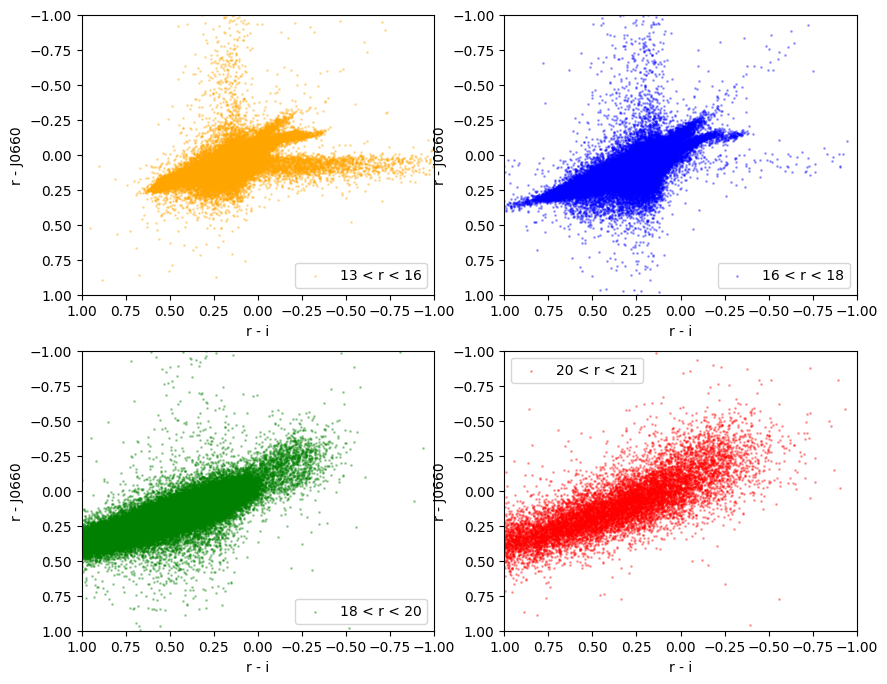

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
ax1.scatter(df1['mag_pstotal_r'] - df1['mag_pstotal_i'], df1['mag_pstotal_r'] - df1['mag_pstotal_j0660'], s=1, label='13 < r < 16', color='orange', alpha=0.3)
ax2.scatter(df2['mag_pstotal_r'] - df2['mag_pstotal_i'], df2['mag_pstotal_r'] - df2['mag_pstotal_j0660'], s=1, label='16 < r < 18', color='blue', alpha=0.3)
ax3.scatter(df3['mag_pstotal_r'] - df3['mag_pstotal_i'], df3['mag_pstotal_r'] - df3['mag_pstotal_j0660'], s=1, label='18 < r < 20', color='green', alpha=0.3)
ax4.scatter(df4['mag_pstotal_r'] - df4['mag_pstotal_i'], df4['mag_pstotal_r'] - df4['mag_pstotal_j0660'], s=1, label='20 < r < 21', color='red', alpha=0.3)
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('r - i')
    ax.set_ylabel('r - J0660')
    ax.set_ylim(1, -1)
    ax.set_xlim(-1, 1)
    ax.legend()
    ax.invert_xaxis()